Epoch [1/10], Loss: 0.5993, Training Accuracy: 80.05 %, Validation Accuracy: 83.39 %
Epoch [2/10], Loss: 0.5996, Training Accuracy: 82.03 %, Validation Accuracy: 82.99 %
Epoch [3/10], Loss: 0.4319, Training Accuracy: 84.33 %, Validation Accuracy: 82.91 %
Epoch [4/10], Loss: 0.3854, Training Accuracy: 85.89 %, Validation Accuracy: 83.15 %
Epoch [5/10], Loss: 0.3706, Training Accuracy: 87.21 %, Validation Accuracy: 87.46 %
Epoch [6/10], Loss: 0.3902, Training Accuracy: 87.72 %, Validation Accuracy: 84.98 %
Epoch [7/10], Loss: 0.3059, Training Accuracy: 88.75 %, Validation Accuracy: 86.82 %
Epoch [8/10], Loss: 0.2882, Training Accuracy: 90.16 %, Validation Accuracy: 87.14 %
Epoch [9/10], Loss: 0.2724, Training Accuracy: 90.27 %, Validation Accuracy: 85.86 %
Epoch [10/10], Loss: 0.2662, Training Accuracy: 90.76 %, Validation Accuracy: 86.02 %


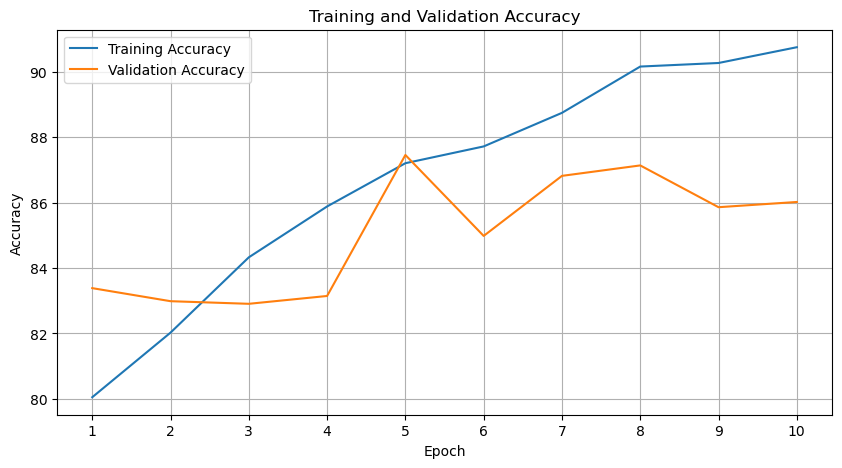

Accuracy of the model on the test images: 86.0223642172524 %
Final Validation Accuracy: 86.0223642172524%


In [3]:
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import os
import matplotlib.pyplot as plt


transform = transforms.Compose([
    transforms.Resize((128, 128)),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


train_dataset = datasets.ImageFolder(root='a5_data/train', transform=transform)
val_dataset = datasets.ImageFolder(root='a5_data/val', transform=transform)


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=5)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=5)


# Function to plot training and validation accuracy
def plot_accuracies(training_accuracies, validation_accuracies):
    epochs = list(range(1, len(training_accuracies) + 1))
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, training_accuracies, label='Training Accuracy')
    plt.plot(epochs, validation_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xticks(epochs)
    plt.legend()
    plt.grid(True)
    plt.show()


# Evaluate the model
def evaluate_model(model, test_loader, device, verbose=True):
    model.eval()  # Set the model to evaluation mode
    correct, total = 0, 0
    with torch.no_grad():  # No gradient tracking needed
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    if verbose:
        print(f'Accuracy of the model on the test images: {accuracy} %')
    return accuracy



# Train the model
def train_model(model,model_name, train_loader, val_loader, criterion, optimizer, num_epochs, device):
    training_accuracies = []
    validation_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        running_loss = 0.0
        correct = 0
        total = 0
        
        for i, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        training_accuracy = 100 * correct / total
        training_accuracies.append(training_accuracy)

        # Evaluate after every epoch
        val_accuracy = evaluate_model(model, val_loader, device, verbose=False)
        validation_accuracies.append(val_accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}, '
              f'Training Accuracy: {training_accuracy:.2f} %, '
              f'Validation Accuracy: {val_accuracy:.2f} %')
    
        # Save the model checkpoint
        torch.save(model.state_dict(), f'model/{model_name}_{epoch}_{val_accuracy:.2f}.pth')
    return training_accuracies, validation_accuracies  



vgg16_model = models.vgg16(pretrained=True)


for param in vgg16_model.features.parameters():
    param.requires_grad = False


num_ftrs = vgg16_model.classifier[6].in_features
vgg16_model.classifier[6] = nn.Linear(num_ftrs, 2)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16_model.classifier.parameters(), lr=0.001)  


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vgg16_model.to(device)


num_epochs = 10
training_accuracies, validation_accuracies = train_model(vgg16_model, 'vgg16_model',train_loader, val_loader, criterion, optimizer, num_epochs, device)


plot_accuracies(training_accuracies, validation_accuracies)


accuracy = evaluate_model(vgg16_model, val_loader, device)
print(f'Final Validation Accuracy: {accuracy}%')


Epoch [1/20], Loss: 0.7471, Training Accuracy: 70.11 %, Validation Accuracy: 77.56 %
Epoch [2/20], Loss: 0.7068, Training Accuracy: 71.21 %, Validation Accuracy: 80.91 %
Epoch [3/20], Loss: 0.6128, Training Accuracy: 72.27 %, Validation Accuracy: 82.75 %
Epoch [4/20], Loss: 0.5419, Training Accuracy: 74.04 %, Validation Accuracy: 78.67 %
Epoch [5/20], Loss: 0.5418, Training Accuracy: 73.75 %, Validation Accuracy: 75.48 %
Epoch [6/20], Loss: 0.5270, Training Accuracy: 74.11 %, Validation Accuracy: 83.15 %
Epoch [7/20], Loss: 0.5188, Training Accuracy: 73.72 %, Validation Accuracy: 79.15 %
Epoch [8/20], Loss: 0.5319, Training Accuracy: 75.01 %, Validation Accuracy: 81.95 %
Epoch [9/20], Loss: 0.5305, Training Accuracy: 74.71 %, Validation Accuracy: 76.52 %
Epoch [10/20], Loss: 0.5223, Training Accuracy: 74.76 %, Validation Accuracy: 82.11 %
Epoch [11/20], Loss: 0.5328, Training Accuracy: 75.69 %, Validation Accuracy: 81.39 %
Epoch [12/20], Loss: 0.5086, Training Accuracy: 75.46 %, Valida

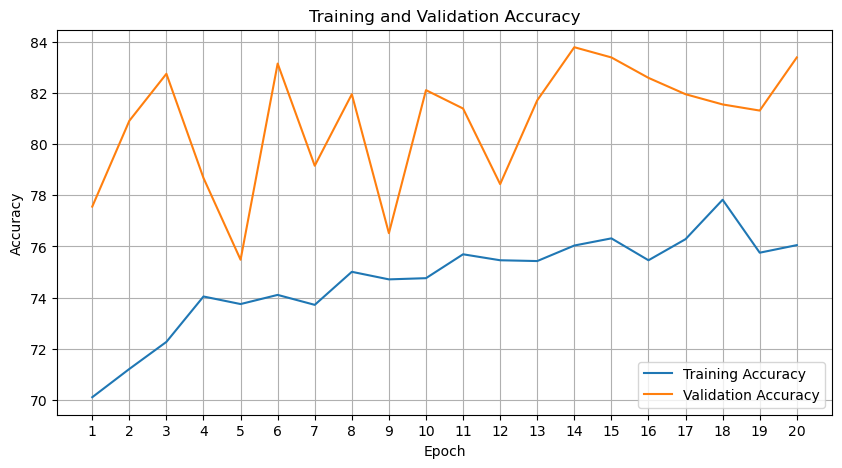

Accuracy of the model on the test images: 83.38658146964856 %
Final Validation Accuracy: 83.38658146964856%


In [4]:
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(128),  
    transforms.RandomHorizontalFlip(),  
    transforms.RandomRotation(20),  
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  
])




val_transforms = transforms.Compose([
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


train_dataset = datasets.ImageFolder(root='a5_data/train', transform=train_transforms)
val_dataset = datasets.ImageFolder(root='a5_data/val', transform=val_transforms)


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)



vgg16_model = models.vgg16(pretrained=True)


for param in vgg16_model.features.parameters():
    param.requires_grad = False


num_ftrs = vgg16_model.classifier[6].in_features
vgg16_model.classifier[6] = nn.Linear(num_ftrs, 2)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16_model.classifier.parameters(), lr=0.001)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vgg16_model.to(device)


num_epochs = 20
training_accuracies, validation_accuracies = train_model(vgg16_model, 'vgg16_da_model',train_loader, val_loader, criterion, optimizer, num_epochs, device)


plot_accuracies(training_accuracies, validation_accuracies)


accuracy = evaluate_model(vgg16_model, val_loader, device)
print(f'Final Validation Accuracy: {accuracy}%')